In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scsavailability import model as md, features as ft

In [3]:
path = 'C:/Users/chris.hughes/Documents/git/scs/data/'

In [4]:
av_raw = pd.read_csv(path+"Availability_for_ML.csv")
fa_nov = pd.read_csv(path+"SCS_Alerts_NOV.csv")
fa_oct = pd.read_csv(path+"SCS_Alerts_OCT.csv")

data = ft.pre_process_av_and_fa_oct_nov(av_raw,fa_oct,fa_nov,remove_same_location_faults = True)

fa = data['faults']
av = data['availability']

fa = ft.floor_time(fa,'Entry time') 

fa = ft.faults_aggregate_and_pivot(df=fa,
                                time_col='Entry time',
                                fault_level='fault ID type',
                                agg_col='Duration',
                                agg_type='sum',#can use mean/count/sum
                                quadrant=None) # by default all quadrants are kept

av = ft.availability_quadrant_mean(df=av,
                                time_col='Datetime') # by default all quadrants are kept

df = ft.merge_av_fa(av_df=av,
                 fa_df=fa,
                 min_date=None, 
                 max_date=None) #specify min/max date if you want to filter data by date


#remove columns with only zeros (faults that did not happen in this period of time or quadrant)
df = df.loc[:, (df != 0).any(axis=0)]
df.head(3)

Quadrants Assigned
Modules Assigned
duplicated location faults removed - max duration kept
Fault and availability data pre-processed
Time shifted by 0m
Faults aggregated and pivoted
Availability data aggregated
Availability and fault datasets merged


,Datetime,Downtime,0,3000,3104,3107,3114,3211,3222,3415,...,11656,11816,11822,11823,11824,11848,12008,12014,12015,12016
0,2020-10-16 06:00:00,0.370236,331,0,347,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-10-16 07:00:00,0.327088,466,0,1700,0.0,0,0.0,0,0,...,4,0,30,0,0,0,0,80,0,0
2,2020-10-16 08:00:00,0.234701,167,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


Feature Importance Ranking: 
 
    Importance Feature
0    0.207043    5105
1    0.060601    3419
2    0.055831    3428
3    0.054964    5120
4    0.046338    3429
5    0.042427    5100
6    0.042233    3416
7    0.041984    5416
8    0.040187    5329
9    0.033343    3611

Number of Selected Features:30

Regression Metrics: 
 
              D_Tree         RF  RF Reduced
MAE        0.151335   0.100437    0.104041
MSE       0.0360151   0.017064    0.017039
RMSE       0.189776   0.130630    0.130533
MAPE%         47.97  33.120000   33.840000
ACC%          52.03  66.880000   66.160000
OOB             N/A   0.233167    0.244274
R2_Train          1   0.895582    0.896370
R2_Pred   -0.451654   0.312194    0.237096


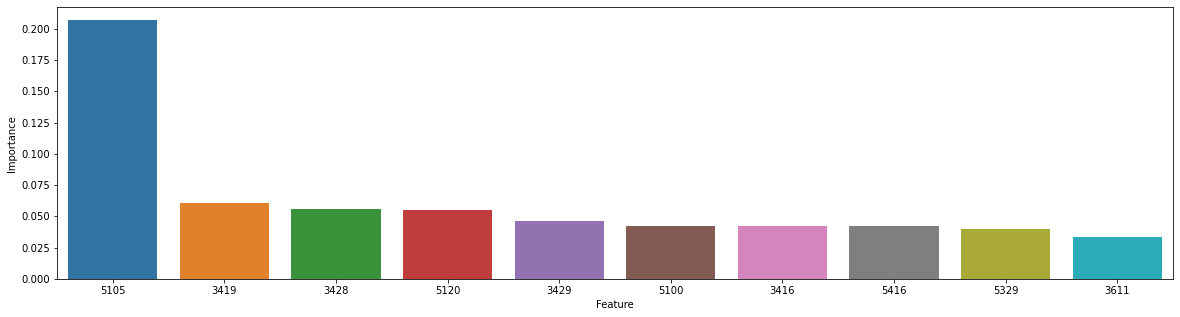

In [5]:
#df = df.reset_index()
md.run_model(df,num_trees=100)